In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("../../data/raw-data/data_1.csv")
df2 = pd.read_csv("../../data/raw-data/data_2.csv")

frames = [df1, df2]
  
result = pd.concat(frames)
result.to_csv("../../data/preprocessed-data/fetal.csv")

In [3]:
data = pd.read_csv("../../data/preprocessed-data/fetal.csv")
# data.drop(columns=['Unnamed:0'], axis=1
data.drop(columns=['Unnamed: 0'], axis =1, inplace=True)                                                                                                                                                                                                                                                                              

In [5]:
data.shape

(2126, 22)

In [116]:
data.isna().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [117]:
for column in data.columns:
    print(column, len(data[column].unique()))

baseline value 48
accelerations 20
fetal_movement 102
uterine_contractions 16
light_decelerations 16
severe_decelerations 2
prolongued_decelerations 6
abnormal_short_term_variability 75
mean_value_of_short_term_variability 57
percentage_of_time_with_abnormal_long_term_variability 87
mean_value_of_long_term_variability 249
histogram_width 154
histogram_min 109
histogram_max 86
histogram_number_of_peaks 18
histogram_number_of_zeroes 9
histogram_mode 88
histogram_mean 103
histogram_median 95
histogram_variance 133
histogram_tendency 3
fetal_health 3


In [6]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1


In [9]:
categorical_columns = ['severe_decelerations', 'histogram_tendency']
numerical_columns = list(set(data.columns) - set(categorical_columns))
print(categorical_columns)
print(numerical_columns)

['severe_decelerations', 'histogram_tendency']
['abnormal_short_term_variability', 'histogram_number_of_peaks', 'histogram_mean', 'histogram_min', 'mean_value_of_short_term_variability', 'fetal_health', 'histogram_max', 'histogram_width', 'fetal_movement', 'histogram_median', 'uterine_contractions', 'baseline value', 'mean_value_of_long_term_variability', 'light_decelerations', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mode', 'accelerations', 'histogram_number_of_zeroes', 'histogram_variance', 'prolongued_decelerations']


In [123]:
data = data.drop_duplicates()

In [124]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.000,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,128,0.000,0.002,0.007,0.005,0.0,0.002,65,2.6,0,...,63,192,6,0,103,92,114,28,0,3
2122,128,0.000,0.002,0.007,0.005,0.0,0.002,66,2.7,0,...,63,192,4,0,105,89,112,21,0,3
2123,128,0.000,0.002,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,6,0,104,94,115,28,0,3
2124,128,0.000,0.003,0.007,0.006,0.0,0.002,65,2.5,0,...,63,192,5,0,114,97,116,25,0,3


In [96]:
data.to_csv("final_data.csv")

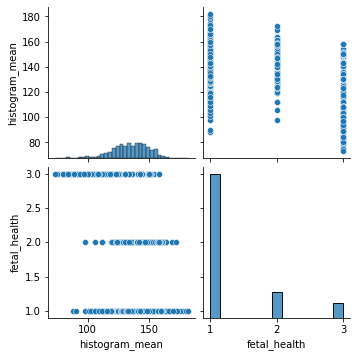

In [71]:
sns.pairplot(data=data[['histogram_mean', 'fetal_health']])


                                                    baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.081885   
fetal_movement                                           -0.033949   
uterine_contractions                                     -0.149587   
light_decelerations                                      -0.159836   
severe_decelerations                                     -0.053706   
prolongued_decelerations                                 -0.105003   
abnormal_short_term_variability                           0.303502   
mean_value_of_short_term_variability                     -0.278344   
percentage_of_time_with_abnormal_long_term_vari...        0.283918   
mean_value_of_long_term_variability                      -0.028901   
histogram_width                                          -0.147150   
histogram_min                                             0.360129   
histogram_max       

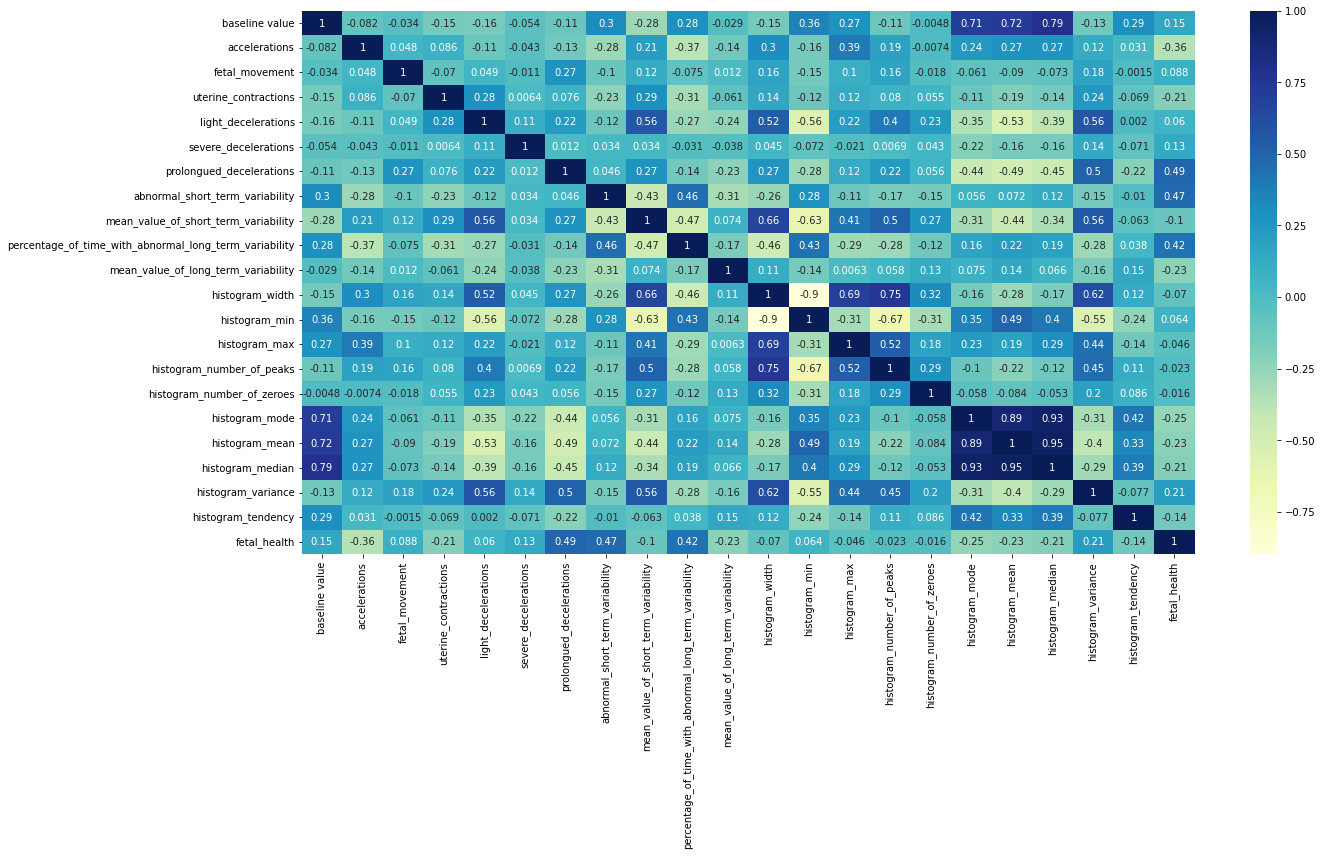

In [65]:
print(data.corr())
  
# plotting correlation heatmap
plt.figure(figsize=(20, 10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap

plt.show()